In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Step 1: Load Data from CSV
data = pd.read_csv('/content/drive/MyDrive/Linear_Algebra/Maths_Stats_AI/Unit1/bank.csv')

# Extract features (excluding the 'Bank' column)
features = data.iloc[:, 1:].values

In [4]:
data

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669
3,4,251,112,129,3650,623
4,5,174,135,128,3400,579
...,...,...,...,...,...,...
510,511,337,140,111,2640,694
511,512,168,131,60,2640,524
512,513,333,86,108,2850,676
513,514,192,176,34,2760,505


In [5]:
# Step 2: Feature Scaling (Standardization)
def scale_features(features):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(features)
    return scaled

scaled_features = scale_features(features)

In [6]:

# Step 3: Compute the Covariance Matrix for PCA
cov_matrix = np.cov(scaled_features.T)

In [7]:
cov_matrix

array([[ 1.00194553, -0.10747464, -0.05894451, -0.0926187 ,  0.65510123],
       [-0.10747464,  1.00194553, -0.1072059 , -0.18976432,  0.56276216],
       [-0.05894451, -0.1072059 ,  1.00194553, -0.02338929,  0.20284066],
       [-0.0926187 , -0.18976432, -0.02338929,  1.00194553, -0.18647884],
       [ 0.65510123,  0.56276216,  0.20284066, -0.18647884,  1.00194553]])

In [8]:
# Step 4: Perform PCA
def pca_transform(scaled_features, n_components=2):
    # Eigen decomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]

    # Project the data onto the top principal components
    reduced_data = np.dot(scaled_features, top_eigenvectors)
    return reduced_data, eigenvalues, eigenvectors,top_eigenvectors

# Reduce data to 2 dimensions
reduced_data, eigenvalues, eigenvectors,top_eigenvectors = pca_transform(scaled_features,n_components=2)

In [9]:
top_eigenvectors

array([[ 0.4829802 ,  0.58241376],
       [ 0.43163746, -0.66824366],
       [ 0.08237282,  0.33042414],
       [-0.28824207,  0.30882817],
       [ 0.70039307,  0.09843613]])

In [10]:
reduced_data

array([[ 0.67093954,  0.04844527],
       [-3.07708367, -0.17308228],
       [ 1.33755744,  0.42435472],
       ...,
       [ 1.02121945,  1.97756252],
       [-0.90802057, -1.43515145],
       [ 2.59752926,  0.65854412]])

In [11]:
# prompt: import PCA and apply PCA on scaled_features

from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Apply PCA to the scaled features
reduced_data_sklearn = pca.fit_transform(scaled_features)

# # The explained variance ratio tells us the proportion of variance explained by each component
# explained_variance_ratio = pca.explained_variance_ratio_
# print("Explained variance ratio:", explained_variance_ratio)

# # The principal components (eigenvectors) are stored in the components_ attribute
# principal_components_sklearn = pca.components_
# print("Principal components (eigenvectors):\n", principal_components_sklearn)

# # The transformed data
# print("Reduced data using scikit-learn PCA:\n", reduced_data_sklearn)

In [12]:
reduced_data_sklearn

array([[ 0.67093954, -0.04844527],
       [-3.07708367,  0.17308228],
       [ 1.33755744, -0.42435472],
       ...,
       [ 1.02121945, -1.97756252],
       [-0.90802057,  1.43515145],
       [ 2.59752926, -0.65854412]])

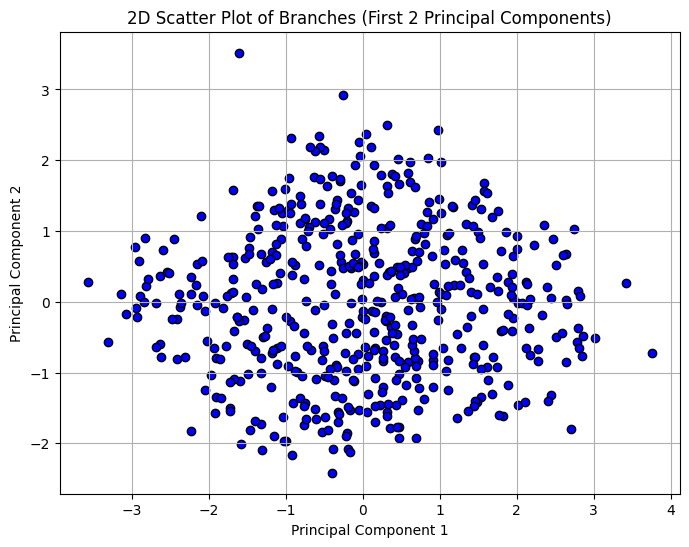

In [13]:

# Step 5: Scatter Plot for Visualization
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', marker='o', edgecolor='k')
plt.title('2D Scatter Plot of Branches (First 2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()